In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("/content/train.csv")

In [19]:
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1164,860,1,1.3,1,8,1,40,0.7,170,3,...,1573,1581,2832,13,7,20,1,1,1,2
1238,1597,1,0.9,0,4,1,4,0.5,85,1,...,880,1145,2130,8,3,15,1,1,0,2
1047,576,0,1.2,0,1,0,30,0.8,162,8,...,847,893,2800,11,6,16,0,1,1,2
65,616,0,1.9,1,13,1,44,0.8,81,3,...,651,1618,3366,18,8,13,1,1,0,3
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1


In [20]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 2000
Number of Columns : 21


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [22]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [23]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [24]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
battery_power,2000,0,0.0,1094
blue,2000,0,0.0,2
clock_speed,2000,0,0.0,26
dual_sim,2000,0,0.0,2
fc,2000,0,0.0,20
four_g,2000,0,0.0,2
int_memory,2000,0,0.0,63
m_dep,2000,0,0.0,10
mobile_wt,2000,0,0.0,121
n_cores,2000,0,0.0,8


In [25]:
df.duplicated().any()

False

In [26]:
df_battery_price = df.groupby('price_range')['battery_power'].mean()

In [27]:
iplot(px.line(df_battery_price,
              labels={'value':'Mean of Battery Capacity','price_range':'Price Range'},
              color_discrete_sequence=['red']
              ))

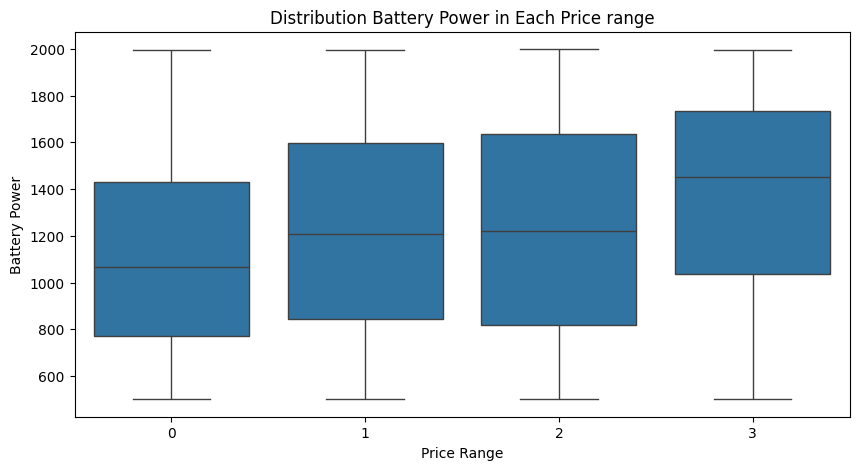

In [28]:
plt.figure(figsize=(10,5))
plt.title('Distribution Battery Power in Each Price range')
sns.boxplot(x=df['price_range'],y=df['battery_power'])
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

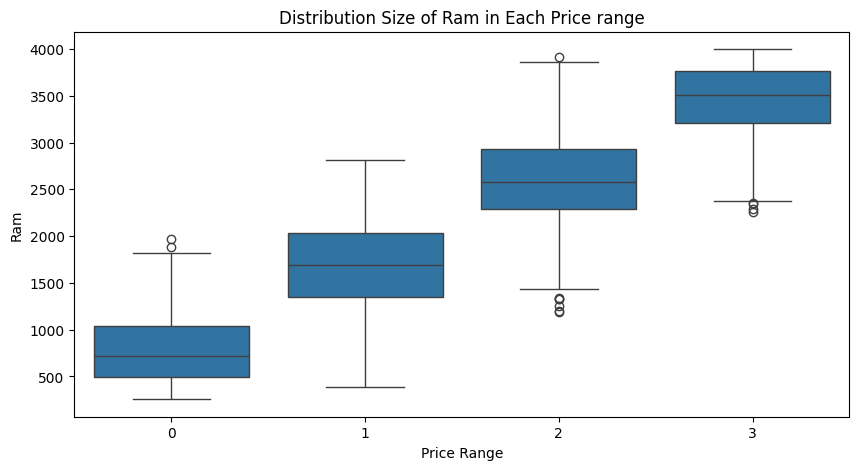

In [29]:
plt.figure(figsize=(10,5))
plt.title('Distribution Size of Ram in Each Price range')
sns.boxplot(x=df['price_range'],y=df['ram'])
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.show()

In [30]:
df_4g = df['four_g'].value_counts()
iplot(px.pie(values=df_4g,
             names=['Support 4G','Not Support 4G'],
             template='plotly_dark',
             title='Is Support 4G ?'
             ).update_traces(textinfo='label+percent'))

In [31]:
df_3g = df['three_g'].value_counts()
iplot(px.pie(values=df_3g,
             names=['Support 3G','Not Support 3G'],
             template='plotly_dark',
             title='Is Support 3G ?'
             ).update_traces(textinfo='label+percent'))

In [32]:
x = df.drop(columns='price_range')
y = df.price_range

In [33]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [35]:
print(f'Shape of X_Train {x_train.shape}')
print(f'Shape of X_Test {x_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (1600, 20)
Shape of X_Test (400, 20)
Shape of Y_Train (1600,)
Shape of Y_Test (400,)


In [36]:
model_params = {
    'svm':{
        'model' : SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}


In [37]:
scores = []

for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x,y)
    scores.append({
            'model':model_name,
            'best_scores':clf.best_score_,
            'best_params':clf.best_params_
        }
    )
pd.DataFrame(scores,columns=['model','best_scores','best_params'])

,model,best_scores,best_params
0,svm,0.9675,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.8025,{'n_estimators': 10}
2,logistic_regression,0.8375,{'C': 10}


In [38]:
model_svm = SVC(kernel='linear',C=20)
model_svm.fit(x_train,y_train)

SVC(C=20, kernel='linear')

In [39]:
score_svm_train = model_svm.score(x_train,y_train)
print(f"Train accuracy: {score_svm_train}")

Train accuracy: 0.985


In [40]:
score_svm_test = model_svm.score(x_test,y_test)
print(f"Test accuracy: {score_svm_test}")

Test accuracy: 0.9675


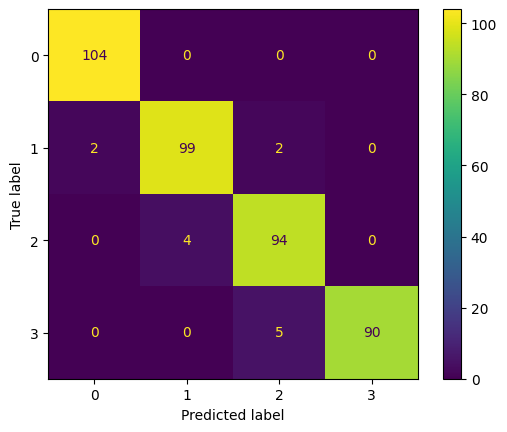

In [41]:
ConfusionMatrixDisplay.from_estimator(model_svm,
                                      x_test,
                                      y_test);

In [42]:
model_LR = LogisticRegression(C=10)
model_LR.fit(x_train,y_train)

LogisticRegression(C=10)

In [43]:
score_LR_train = model_LR.score(x_train,y_train)
print(f"Train accuracy: {score_LR_train}")

Train accuracy: 0.97625


In [44]:
score_LR_test = model_LR.score(x_test,y_test)
print(f"Test accuracy: {score_LR_test}")

Test accuracy: 0.9625


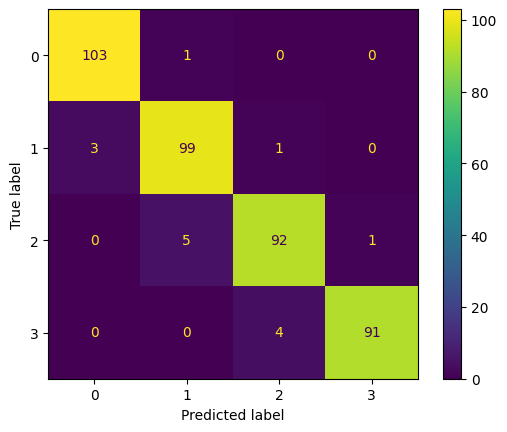

In [45]:
ConfusionMatrixDisplay.from_estimator(model_LR,
                                      x_test,
                                      y_test);

In [46]:
model_RFC = RandomForestClassifier(n_estimators=10,random_state=42)
model_RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [47]:
score_RFC_train = model_RFC.score(x_train,y_train)
print(f"Train accuracy: {score_RFC_train}")

Train accuracy: 0.99625


In [48]:
score_RFC_test = model_RFC.score(x_test,y_test)
print(f"Test accuracy: {score_RFC_test}")

Test accuracy: 0.775


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Training Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train)

# Training XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(x_train, y_train)

# Making predictions on the testing set
gb_predictions = gb_model.predict(x_test)
xgb_predictions = xgb_model.predict(x_test)

In [50]:
mae = mean_absolute_error(y_test, gb_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, gb_predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, gb_predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, gb_predictions)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.22817941229335392
Mean Squared Error (MSE): 0.08178098623979074
Root Mean Squared Error (RMSE): 0.2859737509629
R-squared (R2) Score: 0.9342279345023398


In [51]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, xgb_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, xgb_predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, xgb_predictions)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.2296238880167948
Mean Squared Error (MSE): 0.08295087036290011
Root Mean Squared Error (RMSE): 0.2880119274663813
R-squared (R2) Score: 0.9332870593832233
